### OCR Letter sequence recognition test

#### Import de lib

In [82]:
import numpy as np
import matplotlib.pyplot as plt

#### Dataset

In [83]:
from pystruct.datasets import load_letters

In [84]:
abc = "abcdefghijklmnopqrstuvwxyz"
letters = load_letters()
X, y, folds = letters['data'], letters['labels'], letters['folds']
X, y = np.array(X), np.array(y)
X_train, X_test = X[folds == 1], X[folds != 1]
y_train, y_test = y[folds == 1], y[folds != 1]

In [85]:
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("----------------------------------------------")
print("Exemple sequence : ")
for i, img in enumerate(X_train[0]):
    print("image : {} - label : {} -> {}".format(X_train[0][i], y_train[0][i], abc[y_train[0][i]]))

X_train shape : (704,)
X_test shape : (6173,)
----------------------------------------------
Exemple sequence : 
image : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] - label : 14 -> o
image : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] - label : 12 -> m
image : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] - label : 12 -> m
image : [0 0 0 0 0 0 0 0 0

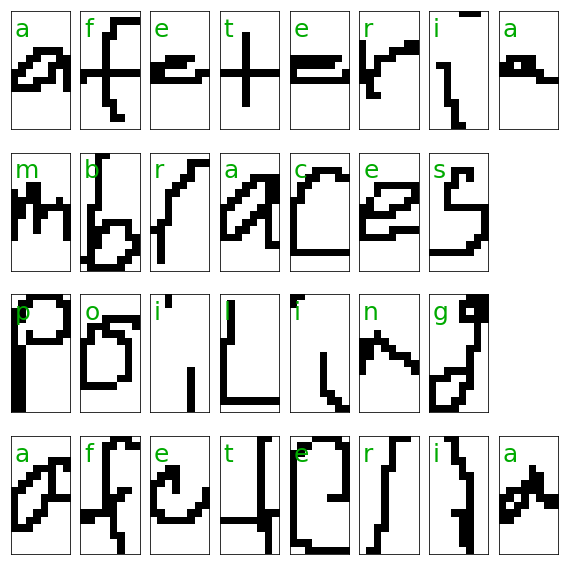

In [86]:
# plot some word sequenced
n_words = 4
rnd = np.random.RandomState(1)
selected = rnd.randint(len(y_test), size=n_words)
max_word_len = max([len(y_) for y_ in y_test[selected]])
fig, axes = plt.subplots(n_words, max_word_len, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
for ind, axes_row in zip(selected, axes):
    for i, (a, image, y_true) in enumerate(
            zip(axes_row, X_test[ind], y_test[ind])):
        a.matshow(image.reshape(16, 8), cmap=plt.cm.Greys)
        a.text(0, 3, abc[y_true], color="#00AA00", size=25)
        a.set_xticks(())
        a.set_yticks(())
    for ii in range(i + 1, max_word_len):
        axes_row[ii].set_visible(False)
plt.show()


### Pystruct Lib

In [87]:
from pystruct.models import ChainCRF
from pystruct.learners import FrankWolfeSSVM

In [88]:
model = ChainCRF()
ssvm = FrankWolfeSSVM(model=model, C=.1, max_iter=11)

In [89]:
ssvm.fit(X_train, y_train)

FrankWolfeSSVM(C=0.1, batch_mode=False, check_dual_every=10,
        do_averaging=True, line_search=True, logger=None, max_iter=11,
        model=ChainCRF(n_states: 26, inference_method: max-product),
        n_jobs=1, random_state=None, sample_method='perm',
        show_loss_every=0, tol=0.001, verbose=0)

In [90]:
print("Test score with chain CRF: %f" % ssvm.score(X_test, y_test))

Test score with chain CRF: 0.785279


### TensorFlow

In [91]:
import tensorflow as tf

In [92]:
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("abc : {}".format(abc))
print("One image shape (num features) : {}, (16x8)".format(X[0][0].shape))

X_train : (704,)
X_test : (6173,)
abc : abcdefghijklmnopqrstuvwxyz
One image shape (num features) : (128,), (16x8)


In [93]:
len(X_train)

704

#### Reshape data for TensorFlow tensors

max lenght of the sequence = 30

In [94]:
max_len = 30

In [95]:
X_train_tf = np.zeros(shape=(len(X_train),max_len, len(X[0][0])), dtype=np.float32)
X_train_tf = X_train_tf
X_train_tf.shape

(704, 30, 128)

In [96]:
for i,seq in enumerate(X_train):
    X_train_tf[i,0:len(seq),:] = seq

In [97]:
y_train_tf = np.zeros(shape=(len(y_train),max_len), dtype=np.int32)
y_train_tf = y_train_tf +26
y_train_tf.shape

(704, 30)

In [98]:
for i,target in enumerate(y_train):
    y_train_tf[i,0:len(target)] = target

In [99]:
y_train_tf

array([[14, 12, 12, ..., 26, 26, 26],
       [14, 12, 12, ..., 26, 26, 26],
       [14, 12, 12, ..., 26, 26, 26],
       ...,
       [13,  2, 14, ..., 26, 26, 26],
       [13,  2, 14, ..., 26, 26, 26],
       [13,  2, 14, ..., 26, 26, 26]], dtype=int32)

In [100]:
sequence_lengths = np.zeros(shape=(len(y_train)), dtype=np.int32)
for i,target in enumerate(y_train):
    sequence_lengths[i] = len(target)

In [101]:
sequence_lengths

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 11,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7, 11, 11, 11, 11, 11, 11,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  3,  3,  3,  3,
        3,  3,  3,  3,  3

## Test data for TF

In [102]:
X_test_tf = np.zeros(shape=(len(X_test),max_len, len(X[0][0])), dtype=np.float32)
X_test_tf = X_test_tf
X_test_tf.shape

(6173, 30, 128)

In [103]:
for i,seq in enumerate(X_test):
    X_test_tf[i,0:len(seq),:] = seq

In [104]:
y_test_tf = np.zeros(shape=(len(y_test),max_len), dtype=np.int32)
y_test_tf = y_test_tf +26
y_test_tf.shape

(6173, 30)

In [105]:
for i,target in enumerate(y_test):
    y_test_tf[i,0:len(target)] = target

In [106]:
y_test_tf

array([[14, 12, 12, ..., 26, 26, 26],
       [14, 12, 12, ..., 26, 26, 26],
       [14, 12, 12, ..., 26, 26, 26],
       ...,
       [13,  2, 14, ..., 26, 26, 26],
       [13,  2, 14, ..., 26, 26, 26],
       [13,  2, 14, ..., 26, 26, 26]], dtype=int32)

In [107]:
sequence_lengths_test = np.zeros(shape=(len(y_test)), dtype=np.int32)
for i,target in enumerate(y_test):
    sequence_lengths_test[i] = len(target)

In [108]:
sequence_lengths_test

array([ 9,  9,  9, ..., 14, 14, 14], dtype=int32)

### Train and evaluate the model

In [109]:
print(X_train_tf.shape)
print(y_train_tf.shape)
print(sequence_lengths.shape)

(704, 30, 128)
(704, 30)
(704,)


In [110]:
X_train_tf[0,9,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [111]:
sequence_lengths

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 11,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7, 11, 11, 11, 11, 11, 11,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  3,  3,  3,  3,
        3,  3,  3,  3,  3

x = tf.placeholder(dtype = tf.float32, shape = [None, 30, 128])
y = tf.placeholder(dtype = tf.int32, shape = [None, 30])
seq_len = tf.placeholder(dtype = tf.int32, shape = [None])

weights = tf.get_variable("weights", [128,27])
matricized_x_t = tf.reshape(x, [-1,128])
matricized_unary_scores = tf.matmul(matricized_x_t, weights)
unary_scores = tf.reshape(matricized_unary_scores, [len(X_train), max_len, 27])
print(unary_scores)

log_likelihood, transition_params = tf.contrib.crf.crf_log_likelihood(unary_scores, y, seq_len)
loss = tf.reduce_mean(-log_likelihood)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [112]:
tf.set_random_seed(12)
with tf.Graph().as_default():
    x = tf.placeholder(dtype = tf.float32, shape = [None, max_len, 128])
    y = tf.placeholder(dtype = tf.int32, shape = [None, max_len])
    seq_len = tf.placeholder(dtype = tf.int32, shape = [None])
    
    weights = tf.get_variable("weights", [128,27])
    matricized_x_t = tf.reshape(x, [-1,128])
    matricized_unary_scores = tf.matmul(matricized_x_t, weights)
    unary_scores = tf.reshape(matricized_unary_scores, [len(X_train), max_len, 27])
    
    log_likelihood, transition_params = tf.contrib.crf.crf_log_likelihood(unary_scores, y, seq_len)
    print(log_likelihood)
    loss = tf.reduce_mean(-log_likelihood)
    
    #test phase
    x_test_ = tf.constant(X_test_tf, dtype=tf.float32)
    y_test_ = tf.constant(y_test_tf, dtype=tf.int32)
    seq_len_test_ = tf.constant(sequence_lengths_test, dtype=tf.int32)
    matricized_x_test = tf.reshape(x_test_,[-1,128])
    matricized_unary_scores_test = tf.matmul(matricized_x_test, weights)
    unary_scores_test = tf.reshape(matricized_unary_scores_test, [len(X_test), max_len, 27])    
    
    viterbi_sequence, viterbi_score = tf.contrib.crf.crf_decode(unary_scores_test, transition_params, seq_len_test_)
    
    #mask_test = tf.sequence_mask(seq_len_test_, max_len)
    #print(mask_test.shape)
    #pred_test = tf.boolean_mask(viterbi_sequence, mask_test)
    #print(pred_test)
    #true_test = tf.boolean_mask(y_test_, mask_test)
    
    #print(pred_test.shape, true_test.shape)
    
    #losses = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unary_scores, labels=y)
    #mask = tf.sequence_mask(seq_len)
    #losses = tf.boolean_mask(losses, mask)
    
    #loss = tf.reduce_mean(losses)
    
    train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)   
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        weights_val_ev = []
        transition_ev = []
        for i in range(1000):
            _,loss_val = sess.run([train_op,loss], feed_dict={x:X_train_tf, y:y_train_tf, seq_len:sequence_lengths})
            
            if i%100 == 0:
                print('epoch {} - loss : {}'.format(i, loss_val))
        _,loss_val, viterbi_sequence = sess.run([train_op,loss,viterbi_sequence], feed_dict={x:X_train_tf, y:y_train_tf, seq_len:sequence_lengths})    
        # Accuracy measure on the pred_seq data
        nb_correct = 0
        nb_img = 0
        for i,sequence in enumerate(y_test):
            nb_img += sequence_lengths_test[i]
            nb_correct_curr = np.sum(y_test[i]==pred_seq[i][0:sequence_lengths_test[i]])
            nb_correct += nb_correct_curr

        accuracy = nb_correct / nb_img
        print("  - acc:  ", accuracy)
        
            #if i%10 == 0:
            #    print('epoch ',i)
            #    print("  - loss: ", loss_val)
                
                # Accuracy measure on the pred_seq data
            #    nb_correct = 0
            #    nb_img = 0
            #    for i,sequence in enumerate(y_test):
            #        nb_img += sequence_lengths_test[i]
            #        nb_correct_curr = np.sum(y_test[i]==pred_seq[i][0:sequence_lengths_test[i]])
            #        nb_correct += nb_correct_curr

            #    accuracy = nb_correct / nb_img
            #    print("  - acc:  ", accuracy)
                
                
                
                #print("  - acc:  ", accuracy)
                
                #weights_val_ev.append(weights_val)
                #transition_ev.append(transition_val)

Tensor("sub_1:0", shape=(704,), dtype=float32)
epoch 0 - loss : 25.948698043823242
epoch 100 - loss : 8.266121864318848
epoch 200 - loss : 6.332079887390137
epoch 300 - loss : 5.411138534545898
epoch 400 - loss : 4.839775562286377
epoch 500 - loss : 4.440479278564453
epoch 600 - loss : 4.140608310699463
epoch 700 - loss : 3.9040944576263428
epoch 800 - loss : 3.7108709812164307
epoch 900 - loss : 3.5488028526306152
  - acc:   0.7806828142035616


In [113]:
print(y_test.shape)
print(y_test[0])

(6173,)
[14 12 12  0 13  3  8 13  6]


In [114]:
print(sequence_lengths_test.shape)
print(sequence_lengths_test[0])

(6173,)
9


In [115]:
pred_seq.shape

(6173, 30)

In [116]:
# Accuracy of the prediction
nb_correct = 0
nb_img = 0
for i,sequence in enumerate(y_test):
    nb_img += sequence_lengths_test[i]
    nb_correct_curr = np.sum(y_test[i]==pred_seq[i][0:sequence_lengths_test[i]])
    nb_correct += nb_correct_curr

accuracy = nb_correct / nb_img
print(accuracy)

0.7806828142035616


In [117]:
i=1
np.sum(y_test_tf[i][0:sequence_lengths_test[i]] == viterbi_seq_test[i][0:sequence_lengths_test[i]])

NameError: name 'viterbi_seq_test' is not defined

In [ ]:
viterbi_seq_test[0][0:sequence_lengths_test[0]]

In [ ]:
import seaborn as sns

In [ ]:
transition_start = transition_ev[0]
sns.heatmap(transition_start)

In [ ]:
transition_end = transition_ev[-1]
sns.heatmap(transition_end)

In [ ]:
y_train

In [ ]:
weights_val.shape

In [ ]:
sns.heatmap(weights_val)

In [ ]:
letter_c_weights = weights_val[:,3]
letter_c_weights = np.reshape(letter_c_weights,newshape=(16,8))
sns.heatmap(letter_c_weights)